In [1]:
%pip install skimpy
%pip install dash-pivottable
%pip install dash
%pip install plotly.express 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [465]:
import plotly.express as px
import skimpy
from skimpy import clean_columns
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from unicodedata import normalize
from sklearn.linear_model import LinearRegression
import dash
from dash import html
import dash_pivottable
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [223]:
url = 'https://www.theguardian.com/news/datablog/2011/mar/18/nuclear-reactors-power-stations-world-list-map'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'lxml')
table1 = soup.find("table")
headers = []
for i in table1.find_all("th"):
 title = i.text
 headers.append(title)

mydata = pd.DataFrame(columns = headers)
for j in table1.find_all("tr")[2:]:
    row_data = j.find_all("td")
    row = [i.text for i in row_data]
    length = len(mydata.axes[0])
    mydata.loc[length] = row

clean_df = clean_columns(mydata, case = 'pascal')
clean_df.columns.tolist()

7 column names have been cleaned

['Facility',
 'Process',
 'CapacityMWeNet',
 'CurrentStatus',
 'StartYear',
 'Owner',
 'Country']

In [473]:
table_MN = pd.read_html('https://www.theguardian.com/news/datablog/2011/mar/18/nuclear-reactors-power-stations-world-list-map')
print(f'Total tables: {len(table_MN)}')
df = table_MN[0]
df.drop(df.tail(1).index,inplace=True)

Total tables: 1


In [117]:
url2 = 'https://world-nuclear.org/information-library/current-and-future-generation/plans-for-new-reactors-worldwide.aspx'
page2 = requests.get(url2)
soup2 = BeautifulSoup(page2.text, 'lxml')
nonBreakSpace = u'\xa0'
soup2.prettify(formatter=lambda s: s.replace(nonBreakSpace, u''))
table2 = soup2.find("table")
headers2 = []
for i in table2.find_all("th"):
 title2 = i.text
 headers2.append(title2)
mydata2 = pd.DataFrame(columns = headers2)
for j in table2.find_all("tr")[1:]:
    row_data2 = j.find_all("td")
    row2 = [i.text for i in row_data2]
    length = len(mydata2.axes[0])
    mydata2.loc[length] = row2
for column in mydata2:
    
    mydata2[column] = mydata2[column].str.replace(u'\xa0', 'NaN')
    mydata2 = mydata2[(mydata2[column] != 'NaN')]

for col in mydata2.columns:
    if len(col) <= 1:
        mydata2.rename(columns={f"{col}" : "Country"}, inplace = True)
    else:
        pass

mydata2['Country actual'] = mydata2['Country'].str.split(',').str[0]
for idx in df.index:
    df['Capacity MWe net'][idx] = float(df['Capacity MWe net'][idx])

for idx in mydata2.index:
    mydata2['Gross MWe'][idx] = float(mydata2['Gross MWe'][idx])

<AxesSubplot:xlabel='Country'>

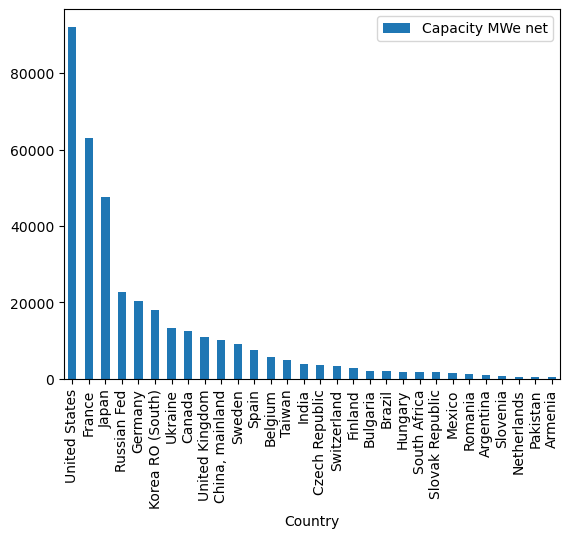

In [118]:
df_grouped = df.groupby(by="Country")["Capacity MWe net"].sum().reset_index()
sorted_df=df_grouped.sort_values(by='Capacity MWe net', ascending=False)
sorted_df.set_index('Country').plot(kind="bar")

<AxesSubplot:xlabel='Country'>

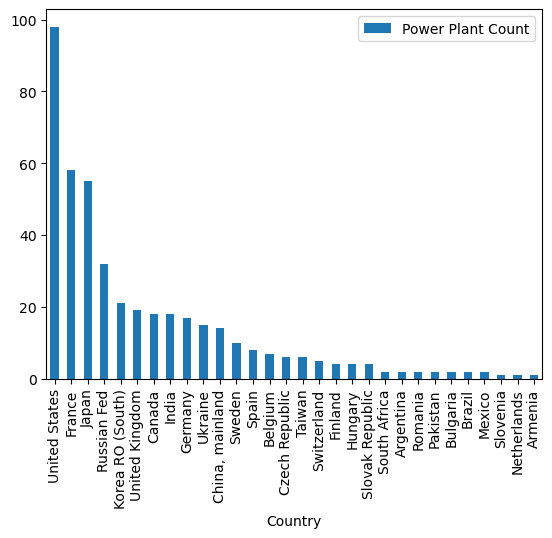

In [119]:
df_plants = pd.DataFrame(df.groupby(["Country"])["Country"].count())
df_plants.rename(columns={'Country': 'Power Plant Count'}, inplace = True)
sorted_df_plants=df_plants.sort_values(by='Power Plant Count', ascending=False)
sorted_df_plants.plot(kind="bar")

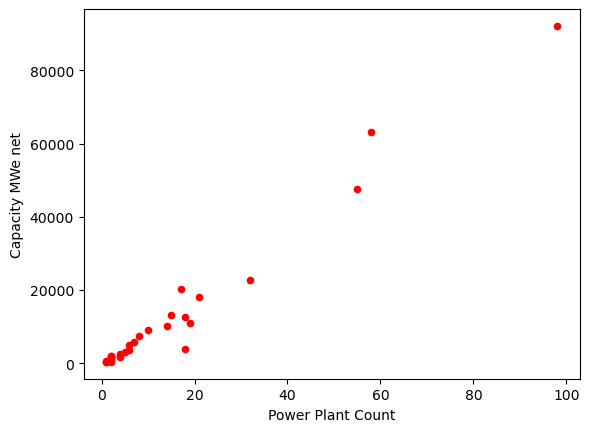

In [120]:
sorted_df_plants = sorted_df_plants.join(sorted_df.set_index('Country')['Capacity MWe net'])
ax = plt.gca()
sorted_df_plants.plot(kind='scatter',x='Power Plant Count',y='Capacity MWe net', color='red', ax=ax,)
plt.show()

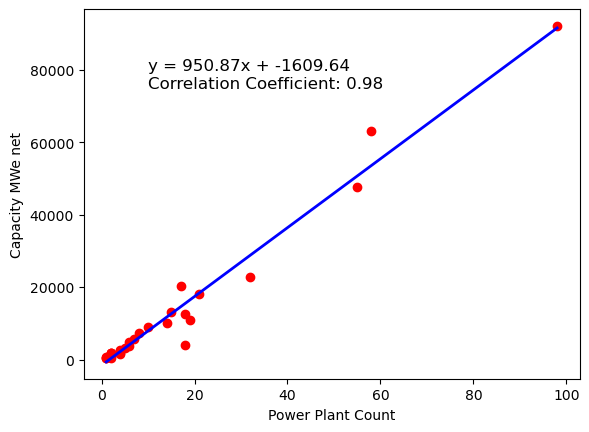

In [122]:

X = sorted_df_plants[['Power Plant Count']]
y = sorted_df_plants['Capacity MWe net']

model = LinearRegression()
model.fit(X, y)

X_array = sorted_df_plants['Power Plant Count']
Y_array = sorted_df_plants['Capacity MWe net'].astype(int)
correlation_coefficient = pd.Series(X_array).corr(pd.Series(Y_array))

plt.scatter(sorted_df_plants['Power Plant Count'], sorted_df_plants['Capacity MWe net'], color='red')
plt.xlabel('Power Plant Count')
plt.ylabel('Capacity MWe net')

plt.plot(X, model.predict(X), color='blue', linewidth=2)

equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(10, 80000, equation, fontsize=12)

plt.text(10, 75000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.show()

<AxesSubplot:xlabel='Process'>

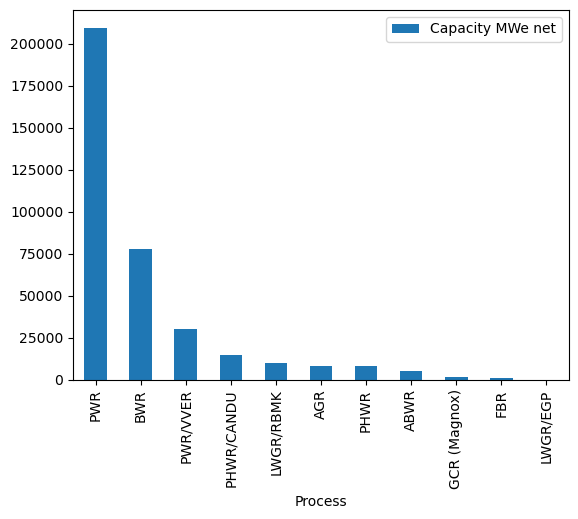

In [125]:
df_process = pd.DataFrame(df.groupby(by="Process")["Capacity MWe net"].sum())
sorted_df_process=df_process.sort_values(by='Capacity MWe net', ascending=False)
sorted_df_process.plot(kind="bar")

<AxesSubplot:xlabel='Process'>

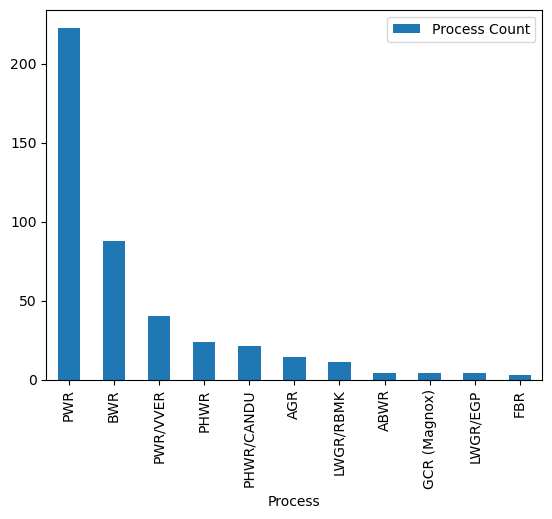

In [126]:
df_proc_count = pd.DataFrame(df.groupby(by="Process")["Country"].count())
df_proc_count.rename(columns={'Country': 'Process Count'}, inplace = True)
sorted_df_proc_count=df_proc_count.sort_values(by='Process Count', ascending=False)
sorted_df_proc_count.plot(kind="bar")


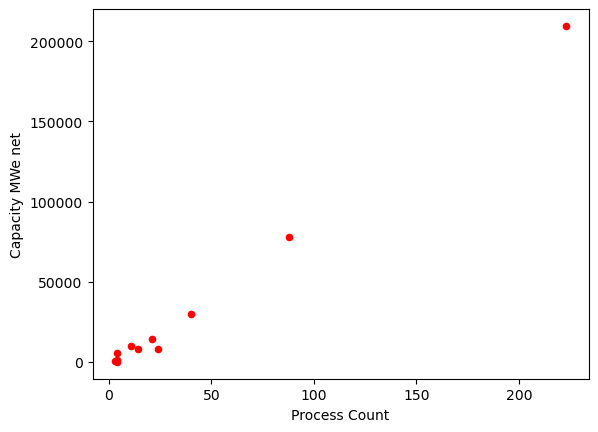

In [128]:
sorted_df_proc_count = sorted_df_proc_count.join(sorted_df_process['Capacity MWe net'])
ax = plt.gca()
sorted_df_proc_count.plot(kind='scatter',x='Process Count',y='Capacity MWe net', color='red', ax=ax,)
plt.show()

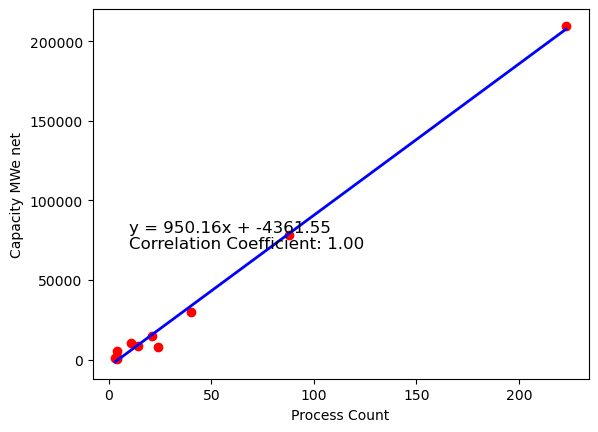

In [136]:

X = sorted_df_proc_count[['Process Count']]
y = sorted_df_proc_count['Capacity MWe net']

model = LinearRegression()
model.fit(X, y)

X_array = sorted_df_proc_count['Process Count']
Y_array = sorted_df_proc_count['Capacity MWe net'].astype(int)

correlation_coefficient = pd.Series(X_array).corr(pd.Series(Y_array))


plt.scatter(sorted_df_proc_count['Process Count'], sorted_df_proc_count['Capacity MWe net'], color='red')
plt.xlabel('Process Count')
plt.ylabel('Capacity MWe net')

plt.plot(X, model.predict(X), color='blue', linewidth=2)

equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(10, 80000, equation, fontsize=12)

plt.text(10, 70000, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.show()

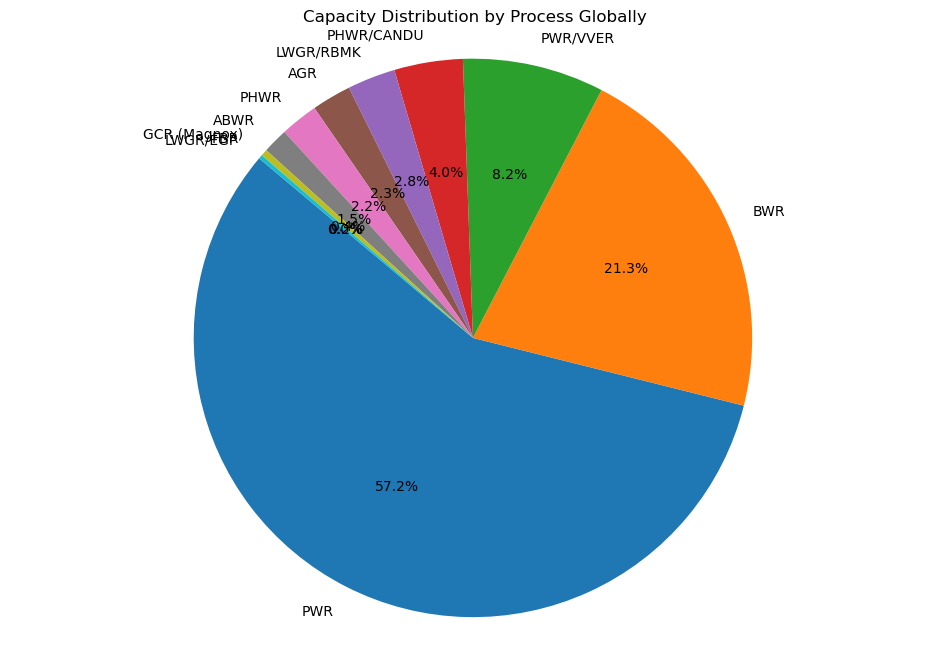

In [156]:
plt.figure(figsize=(12, 8))
sorted_df_process.reset_index(inplace = True)
plt.pie(sorted_df_process['Capacity MWe net'], labels=sorted_df_process['Process'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  

plt.title('Capacity Distribution by Process Globally')

plt.show()

<AxesSubplot:xlabel='Country actual'>

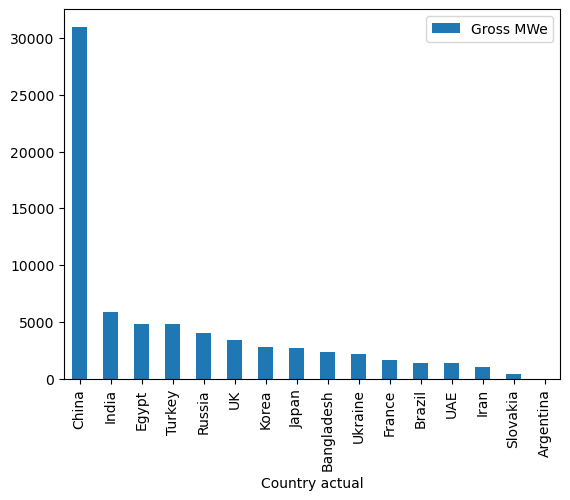

In [162]:
df_groupe = pd.DataFrame(mydata2.groupby(by="Country actual")["Gross MWe"].sum())
sorted_df_groupe=df_groupe.sort_values(by='Gross MWe', ascending=False)
sorted_df_groupe.plot(kind="bar")

<AxesSubplot:xlabel='Country actual'>

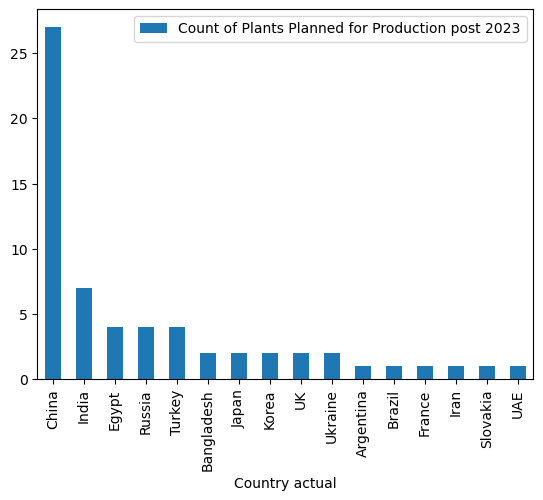

In [167]:
df_plant = pd.DataFrame(mydata2.groupby(["Country actual"])["Country actual"].count())
df_plant.rename(columns={'Country actual': 'Count of Plants Planned for Production post 2023'}, inplace = True)
sorted_df_plant=df_plant.sort_values(by='Count of Plants Planned for Production post 2023', ascending=False)
sorted_df_plant.plot(kind="bar")

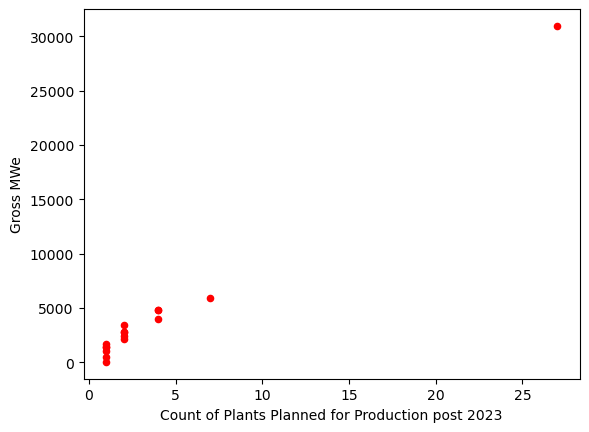

In [170]:
sorted_df_plant = sorted_df_plant.join(sorted_df_groupe['Gross MWe'])
ax = plt.gca()

sorted_df_plant.plot(kind='scatter',x='Count of Plants Planned for Production post 2023',y='Gross MWe', color='red', ax=ax)

plt.show()

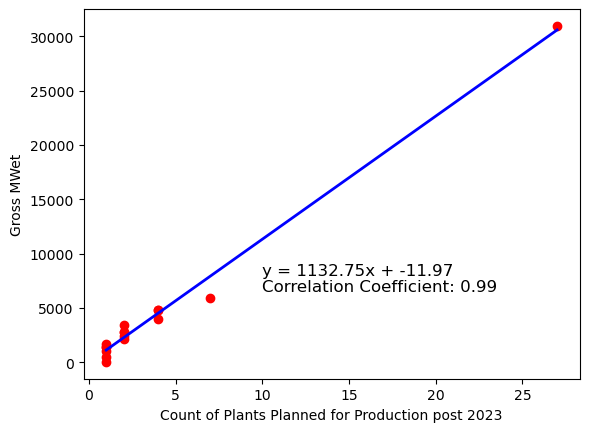

In [175]:

X = sorted_df_plant[['Count of Plants Planned for Production post 2023']]
y = sorted_df_plant['Gross MWe']

model = LinearRegression()
model.fit(X, y)

X_array = sorted_df_plant['Count of Plants Planned for Production post 2023']
Y_array = sorted_df_plant['Gross MWe'].astype(int)

correlation_coefficient = pd.Series(X_array).corr(pd.Series(Y_array))


plt.scatter(sorted_df_plant['Count of Plants Planned for Production post 2023'], sorted_df_plant['Gross MWe'], color='red')
plt.xlabel('Count of Plants Planned for Production post 2023')
plt.ylabel('Gross MWet')

plt.plot(X, model.predict(X), color='blue', linewidth=2)

equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(10, 8000, equation, fontsize=12)

plt.text(10, 6500, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.show()

<AxesSubplot:xlabel='Start †'>

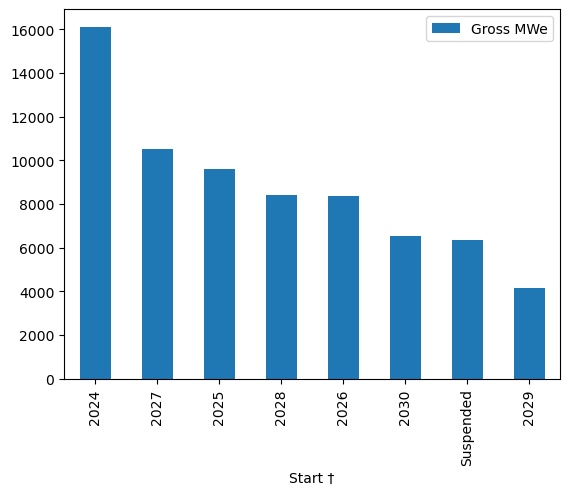

In [177]:

df_start = pd.DataFrame(mydata2.groupby(by="Start †")["Gross MWe"].sum())
sorted_df_start=df_start.sort_values(by='Gross MWe', ascending=False)
sorted_df_start.plot(kind="bar")

<AxesSubplot:ylabel='Gross MWe'>

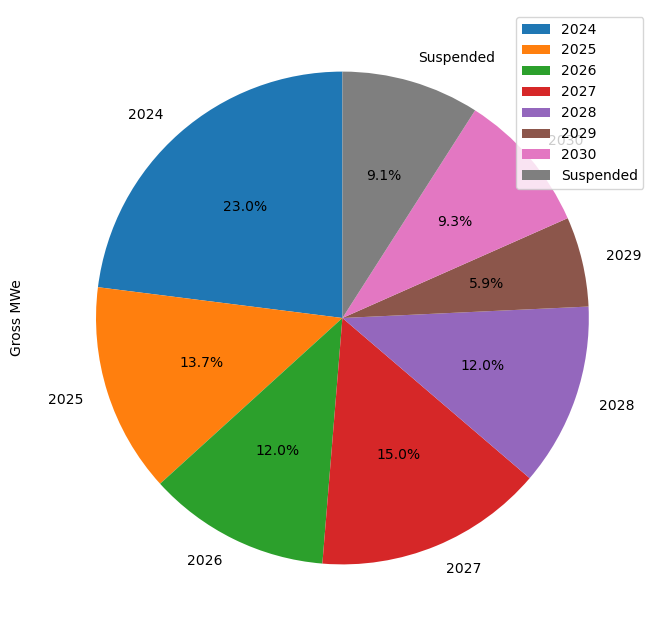

In [475]:
df_start.plot.pie(y='Gross MWe', figsize=(12, 8), autopct='%1.1f%%', startangle=90)

<AxesSubplot:xlabel='Start †'>

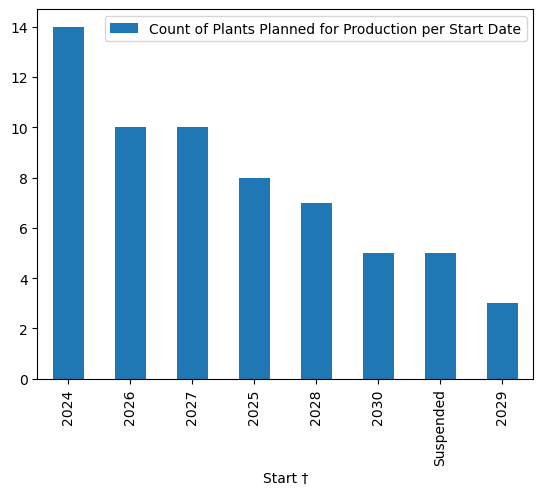

In [180]:
df_number = pd.DataFrame(mydata2.groupby(by="Start †")["Start †"].count())
df_number.rename(columns={'Start †': 'Count of Plants Planned for Production per Start Date'}, inplace = True)
sorted_df_number=df_number.sort_values(by='Count of Plants Planned for Production per Start Date', ascending=False)
sorted_df_number.plot(kind="bar")

In [181]:
sorted_df_number = sorted_df_number.join(sorted_df_start['Gross MWe'])

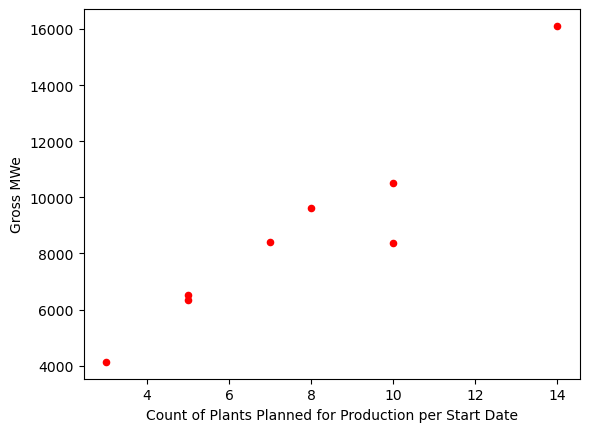

In [182]:
ax = plt.gca()

sorted_df_number.plot(kind='scatter',x='Count of Plants Planned for Production per Start Date',y='Gross MWe', color='red', ax=ax)

plt.show()

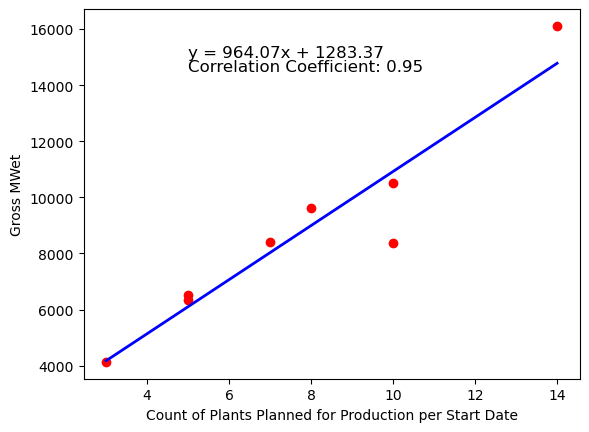

In [188]:

X = sorted_df_number[['Count of Plants Planned for Production per Start Date']]
y = sorted_df_number['Gross MWe']

model = LinearRegression()
model.fit(X, y)

X_array = sorted_df_number['Count of Plants Planned for Production per Start Date']
Y_array = sorted_df_number['Gross MWe'].astype(int)

correlation_coefficient = pd.Series(X_array).corr(pd.Series(Y_array))

plt.scatter(sorted_df_number['Count of Plants Planned for Production per Start Date'], sorted_df_number['Gross MWe'], color='red')
plt.xlabel('Count of Plants Planned for Production per Start Date')
plt.ylabel('Gross MWet')
plt.plot(X, model.predict(X), color='blue', linewidth=2)

equation = f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}'
plt.text(5, 15000, equation, fontsize=12)

plt.text(5, 14500, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12)

plt.show()

In [197]:

step1_6 = mydata2.groupby(['Start †', 'Model'], as_index=False)['Gross MWe'].sum()
fig = px.bar(step1_6, x="Start †", y="Gross MWe", color='Model', barmode="group")

fig.update_layout(
    legend_title_text='Legend Title'
)
fig.show()

In [200]:
step3 = df.groupby(['Process'], as_index=False)['Capacity MWe net'].sum()
step_3_sorted = step3.sort_values(by='Capacity MWe net', ascending=False)
fig = px.bar(step_3_sorted, x="Process", y="Capacity MWe net", barmode="group")
fig.show()

In [202]:
step2 = df.groupby(['Process', 'Current Status', 'Country'], as_index=False)['Capacity MWe net'].sum()
fig = px.bar(step2, x="Country", y="Capacity MWe net", color="Process", barmode="group")
fig.update_layout(
    legend_title_text='Legend Title'
)
fig.show()

In [203]:
step1 = mydata2.groupby(['Country actual', 'Start †'], as_index=False)['Gross MWe'].sum()
fig = px.bar(step1, x="Country actual", y="Gross MWe", color="Start †", barmode="group")
fig.update_layout(
    legend_title_text='Legend Title'
)
fig.show()

Total tables: 5


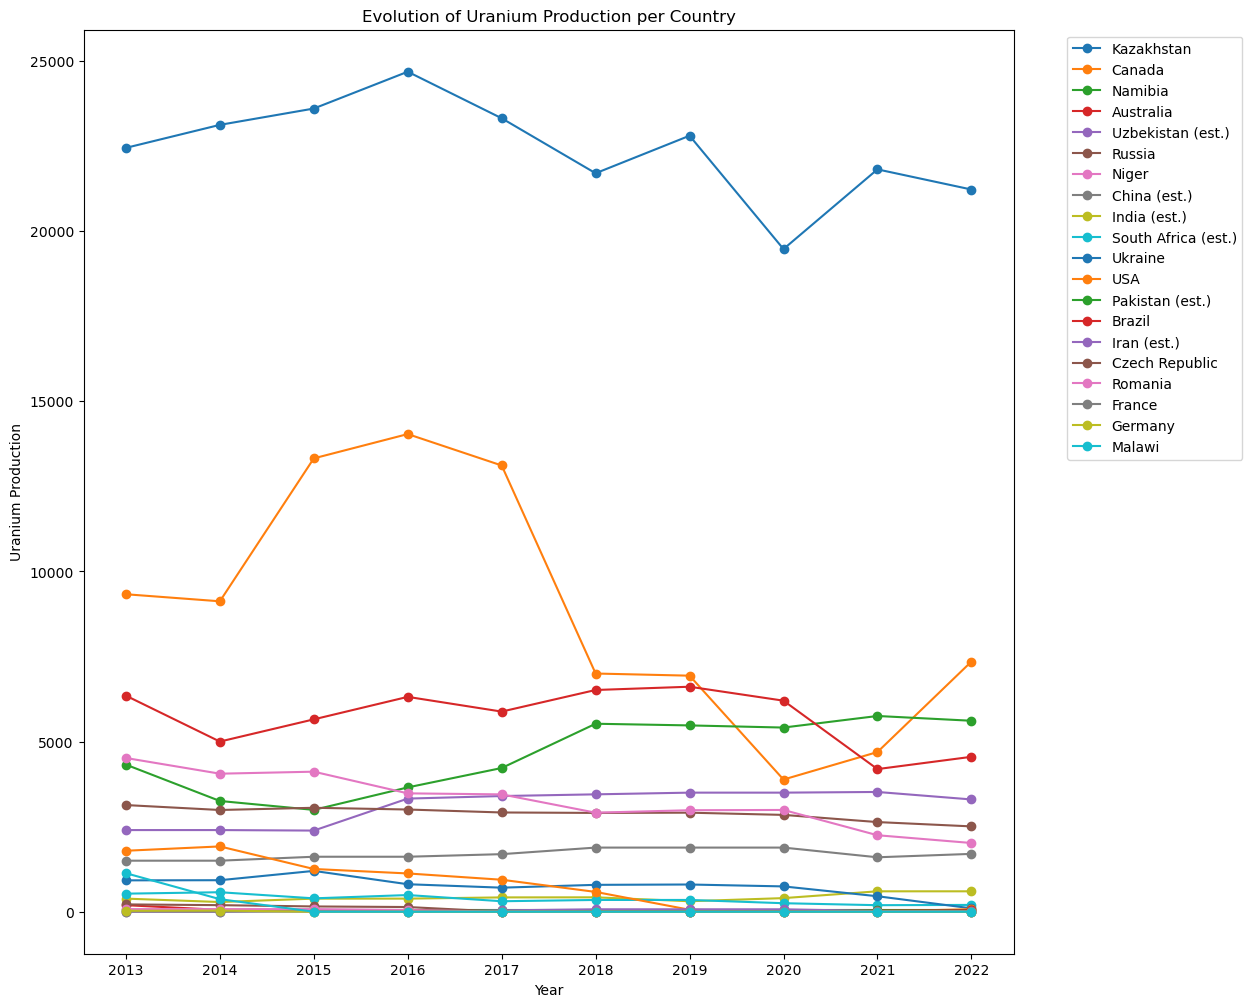

In [277]:
#uranium
url = 'https://world-nuclear.org/information-library/nuclear-fuel-cycle/mining-of-uranium/world-uranium-mining-production.aspx'
table_MN = pd.read_html(url)
print(f'Total tables: {len(table_MN)}')
df_uranium = []
df_ur = table_MN[0]
df_ur.drop(df_ur.tail(3).index,inplace=True)
for table in table_MN:
    df = table
    df.drop(df.tail(0).index,inplace=True) 
    df_uranium.append(df)
df_ur.rename(columns={"Country": "Year"}, inplace = True)
df_ur.set_index('Year', inplace = True)
df_urtranspose = df_ur.T
df_urtranspose.rename(columns={"Country": "Year"})

plt.figure(figsize=(12, 12))
for country in df_urtranspose.columns:
    plt.plot(df_urtranspose.index, df_urtranspose[country].astype(int), marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Uranium Production')
plt.title('Evolution of Uranium Production per Country')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [278]:
df_urtranspose['Total uranium'] = df_urtranspose.sum(axis = 1)

In [281]:
df_ur = df_ur.astype(float)
df_ur['Total country'] = df_ur.sum(axis = 1)

In [336]:
df_ur['country'] = df_ur.index
df_ur['country'] = df_ur.country.str.replace('(est.)','')
df_ur['country'] = df_ur.country.str.replace('[^a-zA-Z]', '')
df_ur.set_index('country',inplace = True)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\3375290220.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\3375290220.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.



In [337]:
df_grouped['country'] = df_grouped.index
df_grouped['country'] = df_grouped.country.str.replace('South','')
df_grouped['country'] = df_grouped.country.str.replace(', mainland','')
df_grouped['country'] = df_grouped.country.str.replace('Fed','')
df_grouped['country'] = df_grouped.country.str.replace('Russian','Russia')
df_grouped['country'] = df_grouped.country.str.replace('United States','USA')
df_grouped['country'] = df_grouped.country.str.replace('RO','')
df_grouped['country'] = df_grouped.country.str.replace('[^a-zA-Z]', '')
df_grouped.set_index('country', inplace = True)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\1860545475.py:8: FutureWarning:

The default value of regex will change from True to False in a future version.



In [345]:
merged_df_nuclear_country_price = pd.merge(left=df_grouped, left_index=True,
                  right=df_ur, right_index=True,
                  how='inner')

In [346]:
merged_df_new = pd.DataFrame(merged_df_nuclear_country_price[['Capacity MWe net', 'Total country']])

In [349]:
df_plants
df_plants['country'] = df_plants.index
df_plants['country'] = df_plants.country.str.replace('South','')
df_plants['country'] = df_plants.country.str.replace('South','')
df_plants['country'] = df_plants.country.str.replace(', mainland','')
df_plants['country'] = df_plants.country.str.replace('Fed','')
df_plants['country'] = df_plants.country.str.replace('Russian','Russia')
df_plants['country'] = df_plants.country.str.replace('United States','USA')
df_plants['country'] = df_plants.country.str.replace('RO','')
df_plants['country'] = df_plants.country.str.replace('[^a-zA-Z]', '')
df_plants.set_index('country', inplace = True)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\1664700160.py:10: FutureWarning:

The default value of regex will change from True to False in a future version.



In [350]:
merged_df_complete_price = pd.merge(left=merged_df_new, left_index=True,
                  right=df_plants, right_index=True,
                  how='inner')

In [351]:

merged_df_complete_price['Capacity MWe net'] = merged_df_complete_price['Capacity MWe net'].astype(float)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                64        
                                                                 
 dense_13 (Dense)            (None, 12)                204       
                                                                 
Total params: 268
Trainable params: 268
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10000000


c:\Users\spyro\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



1/1 [==============================] - 0s 381ms/step - loss: 10163.6660 - accuracy: 0.1111 - val_loss: 5153.9595 - val_accuracy: 0.3333
Epoch 2/10000000
1/1 [==============================] - 0s 16ms/step - loss: 9735.8018 - accuracy: 0.1111 - val_loss: 4888.6953 - val_accuracy: 0.3333
Epoch 3/10000000
1/1 [==============================] - 0s 18ms/step - loss: 9430.0586 - accuracy: 0.1111 - val_loss: 4669.1128 - val_accuracy: 0.3333
Epoch 4/10000000
1/1 [==============================] - 0s 51ms/step - loss: 9178.0303 - accuracy: 0.1111 - val_loss: 4476.1187 - val_accuracy: 0.3333
Epoch 5/10000000
1/1 [==============================] - 0s 32ms/step - loss: 8957.1123 - accuracy: 0.1111 - val_loss: 4300.8525 - val_accuracy: 0.3333
Epoch 6/10000000
1/1 [==============================] - 0s 19ms/step - loss: 8756.8721 - accuracy: 0.1111 - val_loss: 4138.3765 - val_accuracy: 0.3333
Epoch 7/10000000
1/1 [==============================] - 0s 30ms/step - loss: 8571.5225 - accuracy: 0.1111 - v

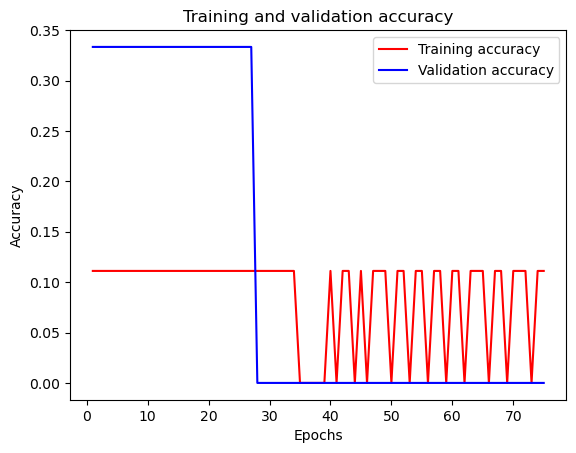

1/1 [==============================] - 0s 32ms/step
[8.5551845e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9991441e-01
 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.9480786e-26 1.3301969e-36
 6.2838561e-31 0.0000000e+00]
0.99999994
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       1.0
           4       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00      12.0
   macr

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [430]:

Y = pd.DataFrame(merged_df_complete_price.index)
X = merged_df_complete_price
X = np.array(X)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(12, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
import keras
from keras.callbacks import EarlyStopping

es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) 

history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=10000000, 
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

preds = model.predict(X) 
print(preds[0])
print(np.sum(preds[0])) 

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix


print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

In [433]:
clean_df.set_index(['Country'])
for index in clean_df['Process'].index:
    if str(clean_df['Process'][index]) == ' PHWR ':
        clean_df['Process'][index] = 1
    elif str(clean_df['Process'][index]) == ' PWR/VVER ':
        clean_df['Process'][index] = 2
    elif str(clean_df['Process'][index]) == ' PWR ':
        clean_df['Process'][index] = 3
    elif str(clean_df['Process'][index]) == ' PHWR/CANDU ':
        clean_df['Process'][index] = 4
    elif str(clean_df['Process'][index]) == ' FBR ':
        clean_df['Process'][index] = 5
    elif str(clean_df['Process'][index]) == ' BWR ':
        clean_df['Process'][index] = 6 
    elif str(clean_df['Process'][index]) == ' ABWR ':
        clean_df['Process'][index] = 7  
    elif str(clean_df['Process'][index]) == ' LWGR/EGP ':
        clean_df['Process'][index] = 8 
    elif str(clean_df['Process'][index]) == ' LWGR/RBMK ':
        clean_df['Process'][index] = 9
    elif str(clean_df['Process'][index]) == ' AGR ':
        clean_df['Process'][index] = 10 
    elif str(clean_df['Process'][index]) == ' GCR (Magnox) ':
        clean_df['Process'][index] = 11

clean_df['StartYear'] = clean_df['StartYear'].str.replace(u'\xa0', 'NaN')
clean_df.drop(clean_df[clean_df['StartYear'] == 'NaN'].index, inplace = True)
clean_df['Process'] = clean_df['Process'].astype(float)
clean_df['CapacityMWeNet'] = clean_df['CapacityMWeNet'].astype(float)
clean_df['StartYear'] = clean_df['StartYear'].astype(int)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                64        
                                                                 
 dense_19 (Dense)            (None, 433)               7361      
                                                                 
Total params: 7,425
Trainable params: 7,425
Non-trainable params: 0
_________________________________________________________________


Epoch 1/8000000


c:\Users\spyro\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



22/22 [==============================] - 1s 7ms/step - loss: 228.3173 - accuracy: 0.0000e+00 - val_loss: 184.6786 - val_accuracy: 0.0092
Epoch 2/8000000
22/22 [==============================] - 0s 3ms/step - loss: 164.5864 - accuracy: 0.0000e+00 - val_loss: 156.9002 - val_accuracy: 0.0000e+00
Epoch 3/8000000
22/22 [==============================] - 0s 2ms/step - loss: 133.3364 - accuracy: 0.0000e+00 - val_loss: 136.8240 - val_accuracy: 0.0000e+00
Epoch 4/8000000
22/22 [==============================] - 0s 2ms/step - loss: 111.8322 - accuracy: 0.0031 - val_loss: 123.0123 - val_accuracy: 0.0000e+00
Epoch 5/8000000
22/22 [==============================] - 0s 2ms/step - loss: 94.7318 - accuracy: 0.0000e+00 - val_loss: 112.2577 - val_accuracy: 0.0000e+00
Epoch 6/8000000
22/22 [==============================] - 0s 2ms/step - loss: 80.3641 - accuracy: 0.0000e+00 - val_loss: 100.6347 - val_accuracy: 0.0000e+00
Epoch 7/8000000
22/22 [==============================] - 0s 2ms/step - loss: 68.0791

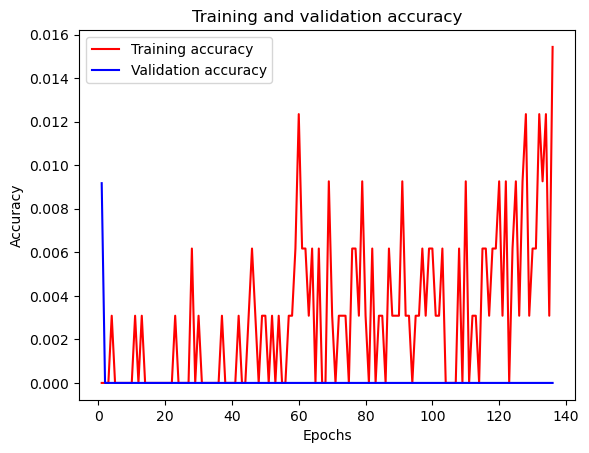

In [439]:
Y = pd.DataFrame(clean_df.index)
X = pd.DataFrame(clean_df[['Process','CapacityMWeNet','StartYear']])

X = np.array(X)
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

dummy_y = np_utils.to_categorical(encoded_Y)

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(433, activation='softmax'))
model.summary()


model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
import keras
from keras.callbacks import EarlyStopping

  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) 

history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000000, 
                    batch_size=15,
                    shuffle=True,
                    validation_split=0.25,
                    verbose=1)
history_dict = history.history


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\1798862747.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



     Process  CapacityMWeNet  StartYear Country
366      3.0          1108.0       1978      29
259      9.0           925.0       1981      19
11       3.0          1270.0       2001       3
220      1.0           700.0       1997      14
35       3.0           935.0       2002       6
231      3.0           452.0       1973      16
183      3.0           780.0       1976      13
210      3.0           903.0       1985      14
249      2.0           411.0       1975      19
67       3.0          1300.0       1988       9
245      2.0           950.0       1985      19
73       3.0           905.0       1988       9
63       3.0           910.0       1979       9
100      3.0          1330.0       1985       9
154      6.0           760.0       1974      13
initial values [1974 0 335.0]
Mapped to [1.00000000e+00 1.97400000e+03 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 5.64084558e+75]


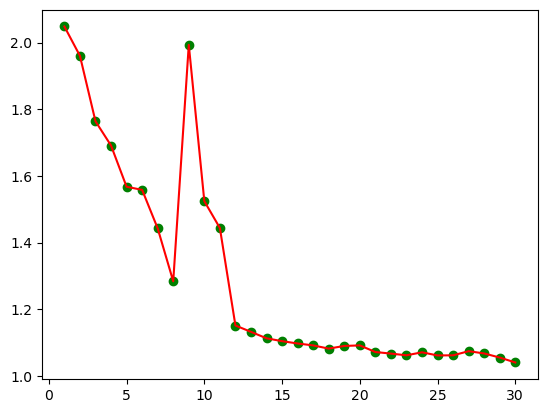

In [447]:
dummies = np.arange(len(clean_df['Country'].unique()))
zipped =list(zip(clean_df['Country'].unique(), dummies))
for index in clean_df['Country'].index:
    for tupled in zipped:
        if clean_df['Country'][index] == tupled[0]:
            clean_df['Country'][index] = tupled[1]
        else:
            continue

poly_modelled = clean_df[['Process','CapacityMWeNet','StartYear', 'Country']].dropna()
print(poly_modelled.sample(n=15))
x_values = poly_modelled[['StartYear', 'Country', 'CapacityMWeNet']].values
y_values = poly_modelled['Process'].values
degree=30

poly_model = PolynomialFeatures(degree=degree)

poly_x_values = poly_model.fit_transform(x_values)

print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')
poly_model.fit(poly_x_values, y_values)

regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)
number_degrees = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_predi = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_predi, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
predictions = pd.DataFrame(data = y_pred,
                  index = clean_df['Country'], 
                  columns = ['Predicted process'])
coefficient_of_dermination = r2_score(predictions['Predicted process'], clean_df['Process'])

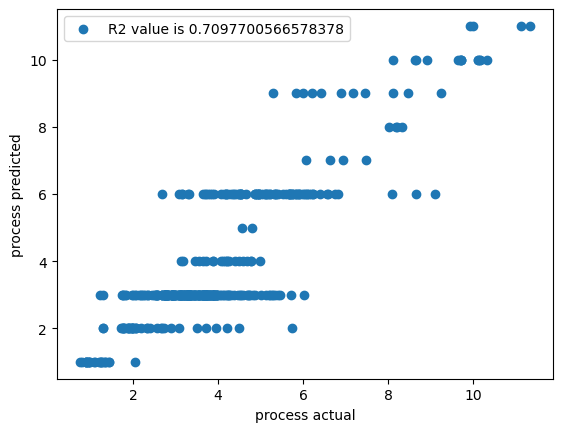

In [448]:
plt.scatter(predictions['Predicted process'], clean_df['Process'], label = f'R2 value is {coefficient_of_dermination}')
plt.legend()
plt.ylabel('process predicted')
plt.xlabel('process actual')
plt.show()

In [450]:

poly_modelled['Country'] = poly_modelled['Country'].astype(float)
X=poly_modelled[['Country', 'CapacityMWeNet', 'StartYear']]
y=poly_modelled['Process']
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=1.0)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=10.



Mean Accuracy: 0.540 (0.038)


In [451]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot = True, fmt = 'd', center = 0, cmap = 'autumn')
    plt.title('confusion matrix')
    plt.ylabel('true label')
    plt.xlabel('predicted label')
    plt.show()

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7916666666666666
0.6666666666666666


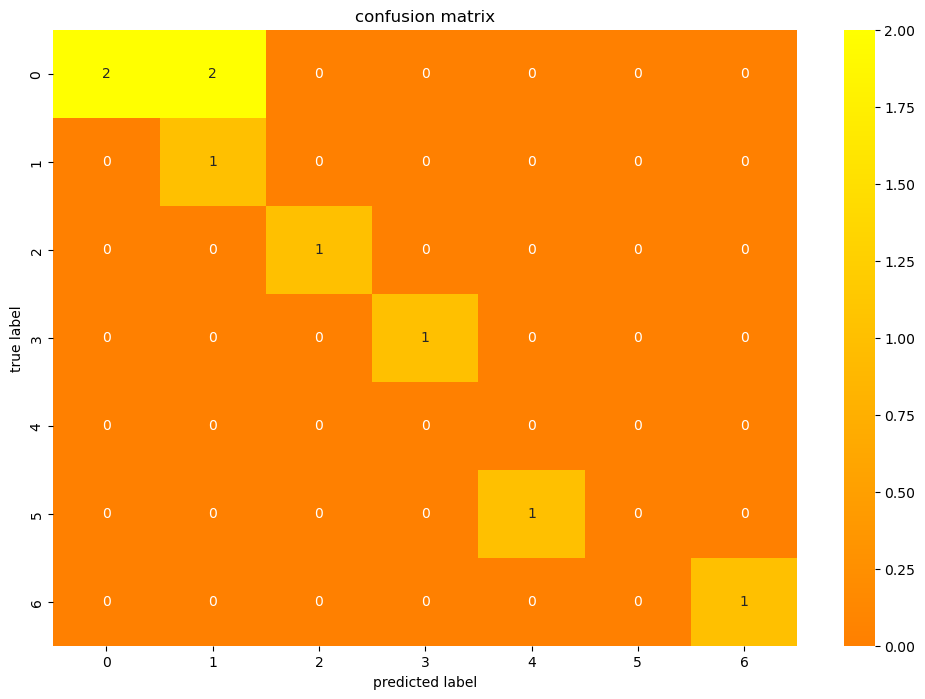

In [452]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)
cm_logreg = confusion_matrix(y_test, y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

0.9791666666666666
0.5555555555555556


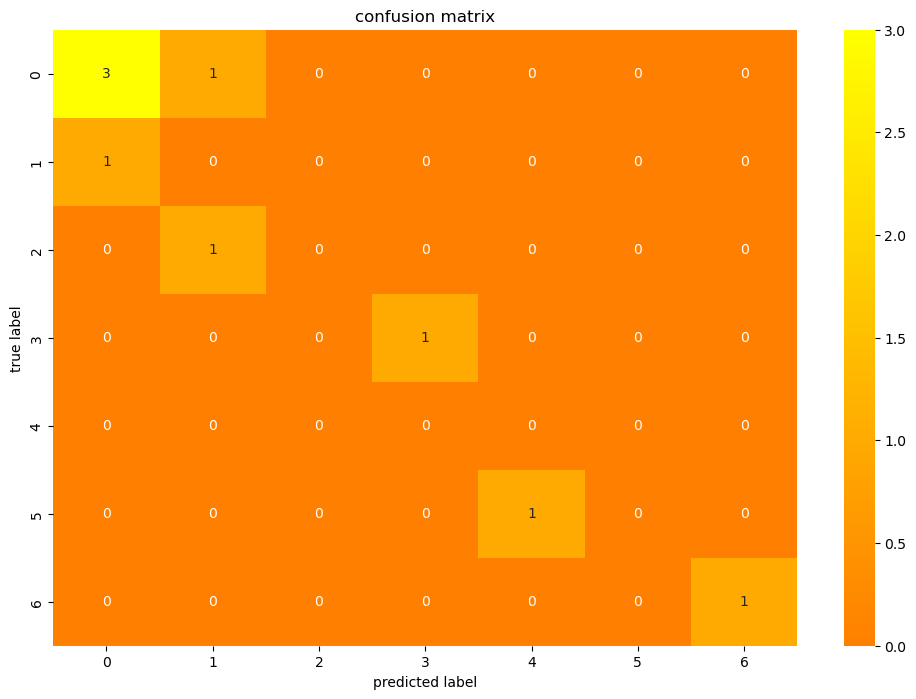

In [454]:
rf = RandomForestClassifier(random_state = 42, n_estimators=30, max_depth = 11, criterion = 'entropy', min_samples_leaf= 1, min_samples_split = 2)
rf.fit(X_train, y_train)
y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)
cm_rf = confusion_matrix(y_test, y_predict_test_rf)
draw_confusion_matrix(cm_rf)

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:

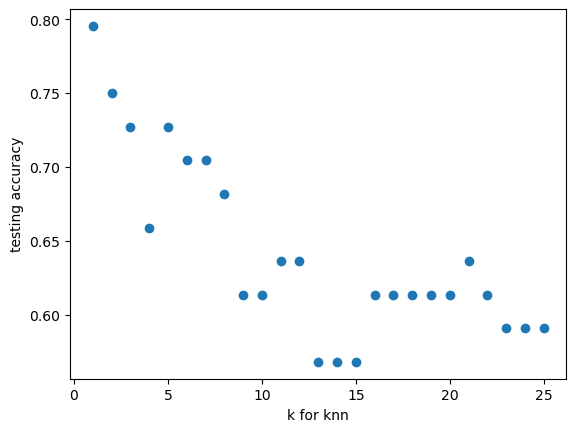

In [457]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 1, p=1, metric = 'minkowski', leaf_size = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p=10, metric = 'minkowski', leaf_size = 10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores
plt.scatter(k_range, scores)
plt.xlabel('k for knn')
plt.ylabel('testing accuracy')
plt.show()

In [458]:

dummies2 = np.arange(len(mydata2['Country actual'].unique()))
zipped2 =list(zip(mydata2['Country actual'].unique(), dummies2))
for index in mydata2['Country actual'].index:
    for tupled in zipped2:
        if mydata2['Country actual'][index] == tupled[0]:
            mydata2['Country actual'][index] = tupled[1]
        else:
            continue
            
dummies3 = np.arange(len(mydata2['Model'].unique()))
zipped3 =list(zip(mydata2['Model'].unique(), dummies3))
for index in mydata2['Model'].index:
    for tupled in zipped3:
        if mydata2['Model'][index] == tupled[0]:
            mydata2['Model'][index] = tupled[1]
        else:
            continue

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\4005811434.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\spyro\AppData\Local\Temp\ipykernel_79828\4005811434.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [460]:
mydata2 = mydata2[mydata2['Start †'] !='Suspended']
mydata2 = mydata2[mydata2['Start †'] !='Suspended']
mydata2['Start †'] = mydata2['Start †'].astype(float)
mydata2['Gross MWe'] = mydata2['Gross MWe'].astype(float)
mydata2['Model'] = mydata2['Model'].astype(float)
mydata2['Country actual'] = mydata2['Country actual'].astype(float)

x_values = mydata2[['Start †', 'Country actual', 'Gross MWe']].values
y_values = mydata2['Model'].values

initial values [2024.    0. 1200.]
Mapped to [1.00000000e+00 2.02400000e+03 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 3.83375999e+61]


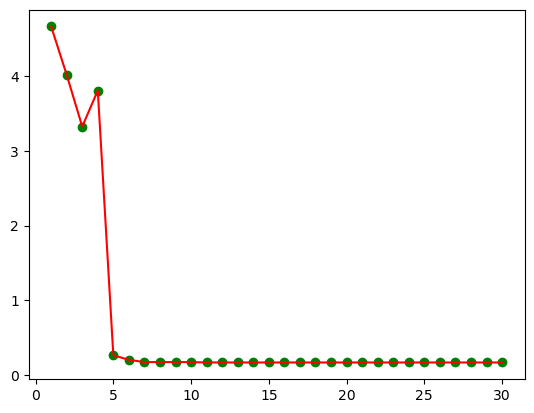

In [462]:

degree=20

poly_model = PolynomialFeatures(degree=degree)

poly_x_values = poly_model.fit_transform(x_values)

print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')
poly_model.fit(poly_x_values, y_values)

regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)
number_degrees = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_predi = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_predi, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

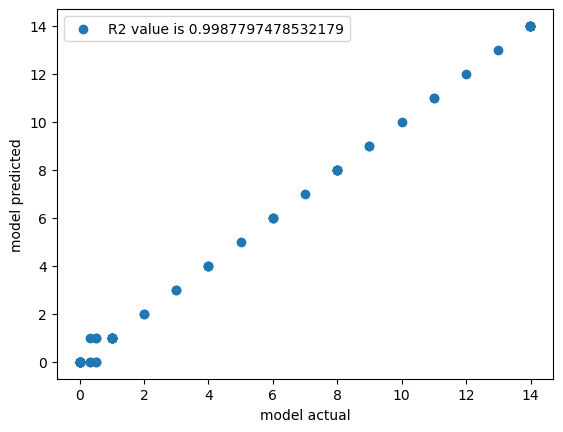

In [463]:

predictions = pd.DataFrame(data = y_pred,
                  index = mydata2.index, 
                  columns = ['Predicted model'])
coefficient_of_dermination = r2_score(predictions['Predicted model'], mydata2['Model'])
plt.scatter(predictions['Predicted model'], mydata2['Model'], label = f'R2 value is {coefficient_of_dermination}')
plt.legend()
plt.ylabel('model predicted')
plt.xlabel('model actual')
plt.show()

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=10.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Mean Accuracy: 0.669 (0.176)
0.7647058823529411
0.5


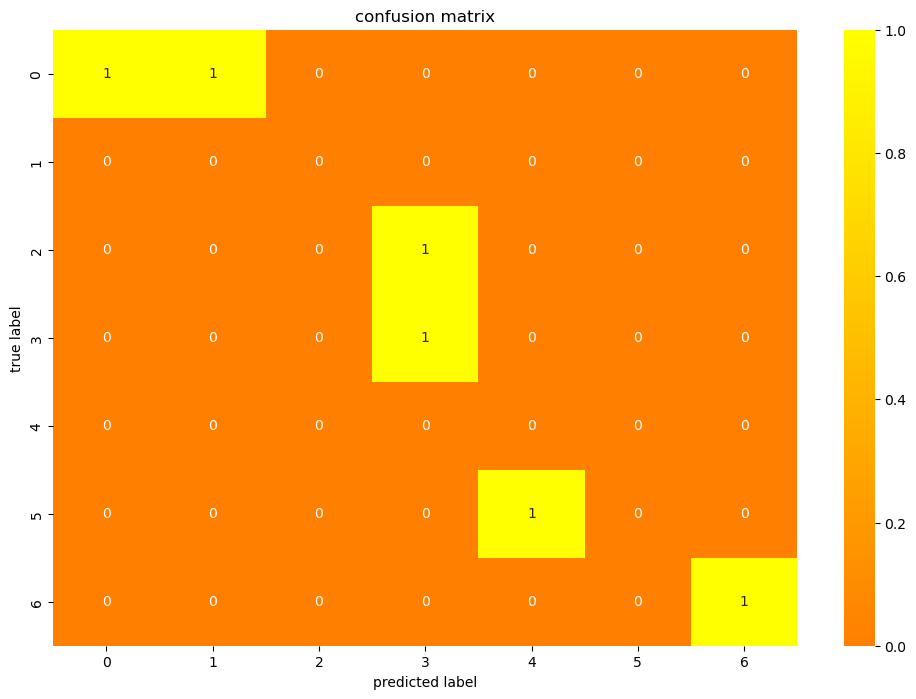

In [469]:

X = mydata2[['Start †', 'Country actual', 'Gross MWe']]
y = mydata2['Model']
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=9.0)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

y_predict_train_logreg = logreg.predict(X_train)
y_predict_test_logreg = logreg.predict(X_test)

train_accuracy_score_logreg = accuracy_score(y_train, y_predict_train_logreg)
test_accuracy_score_logreg = accuracy_score(y_test, y_predict_test_logreg)

print(train_accuracy_score_logreg)
print(test_accuracy_score_logreg)
cm_logreg = confusion_matrix(y_test, y_predict_test_logreg)
draw_confusion_matrix(cm_logreg)

0.9411764705882353
0.8333333333333334


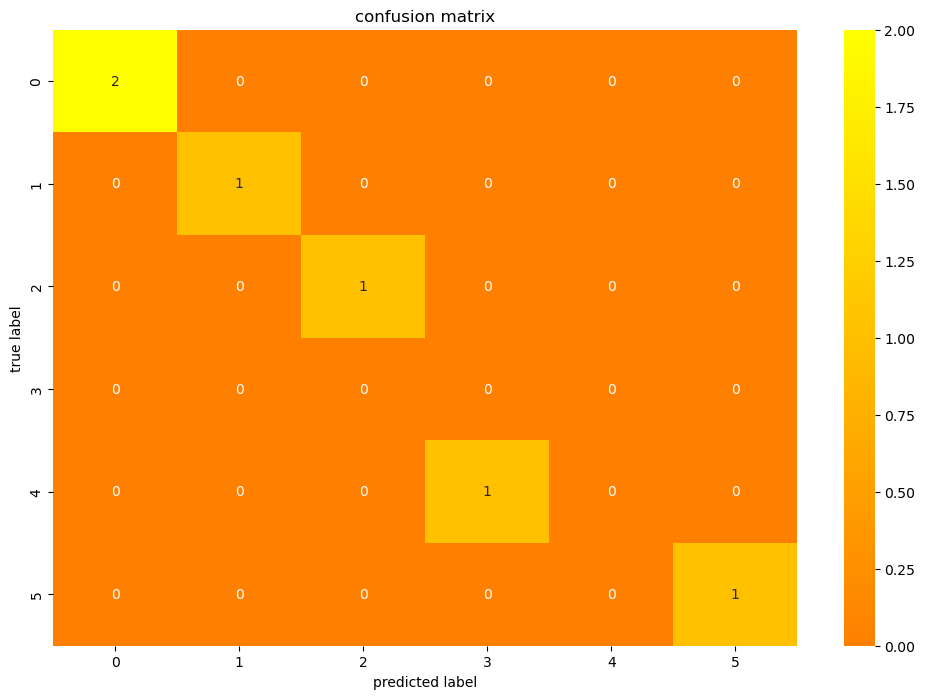

In [471]:
rf = RandomForestClassifier(random_state = 42, n_estimators=25, max_depth = 15, criterion = 'entropy', min_samples_leaf= 1, min_samples_split = 2)
rf.fit(X_train, y_train)
y_predict_train_rf = rf.predict(X_train)
y_predict_test_rf = rf.predict(X_test)

train_accuracy_score_rf = accuracy_score(y_train, y_predict_train_rf)
test_accuracy_score_rf = accuracy_score(y_test, y_predict_test_rf)

print(train_accuracy_score_rf)
print(test_accuracy_score_rf)
cm_rf = confusion_matrix(y_test, y_predict_test_rf)
draw_confusion_matrix(cm_rf)

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\spyro\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:

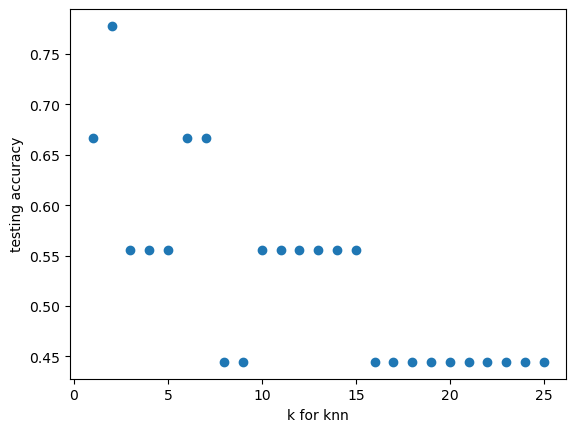

In [472]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 1, p=20, metric = 'minkowski', leaf_size = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, p=20, metric = 'minkowski', leaf_size = 10)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
scores
plt.scatter(k_range, scores)
plt.xlabel('k for knn')
plt.ylabel('testing accuracy')
plt.show()